## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
# import csv file with the proper dtypes
dtype_dict = {
 'branded_code_share': 'string',
 'mkt_carrier': 'string',
 'mkt_carrier_fl_num': 'string',
 'op_unique_carrier': 'string',
 'tail_num': 'string',
 'op_carrier_fl_num': 'string',
 'origin_airport_id': 'string',
 'origin': 'string',
 'origin_city_name': 'string',
 'dest_airport_id': 'string',
 'dest': 'string',
 'dest_city_name': 'string',
 'crs_dep_time': 'int64',
 'dep_time': 'int64',
 'dep_delay': 'int64',
 'taxi_out': 'int64',
 'wheels_off': 'int64',
 'wheels_on': 'int64',
 'taxi_in': 'int64',
 'crs_arr_time': 'int64',
 'arr_time': 'int64',
 'arr_delay': 'int64',
 'crs_elapsed_time': 'int64',
 'actual_elapsed_time': 'int64',
 'air_time': 'int64',
 'distance': 'int64'}
df = pd.read_csv("../LHL_Midterm_Project_Predicting_Flight_Delays/data/ransmpl_clean.csv", parse_dates=[0], dtype=dtype_dict)

In [5]:
df.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2018-03-07,AA,AA,465,AA,N200UU,465,14107,PHX,"Phoenix, AZ",14679,SAN,"San Diego, CA",835,833,-2,13,846,838,2,851,840,-11,76,67,52,304
1,2018-03-07,AA,AA,591,AA,N833AW,591,11057,CLT,"Charlotte, NC",11278,DCA,"Washington, DC",1431,1537,66,16,1553,1648,3,1559,1651,52,88,74,55,331
2,2018-03-07,AA,AA,600,AA,N151UW,600,11697,FLL,"Fort Lauderdale, FL",11057,CLT,"Charlotte, NC",603,557,-6,18,615,746,19,809,805,-4,126,128,91,632
3,2018-03-07,AA,AA,1805,AA,N924US,1805,11057,CLT,"Charlotte, NC",10721,BOS,"Boston, MA",1135,1129,-6,11,1140,1312,12,1352,1324,-28,137,115,92,728
4,2018-03-07,AA,AA,2615,AA,N945NN,2615,11057,CLT,"Charlotte, NC",15370,TUL,"Tulsa, OK",1820,1812,-8,11,1823,1936,6,2002,1942,-20,162,150,133,842


In [6]:
# removing arr_delay outliers (more than 3 std deviations away from mean)
outliers = df[df["arr_delay"].gt(round(df["arr_delay"].mean() + df["arr_delay"].std()*3))]
df2 = df[df["arr_delay"].le(round(df["arr_delay"].mean() + df["arr_delay"].std()*3))]

In [7]:
outliers.shape[0]

outliers.shape[0] / df.shape[0] # percentage of outliers in dataset

6192

0.015874562244589267

In [8]:
df2.shape[0]

df2.shape[0] / df.shape[0]  # percentage of datapoints within 3 std deviations

383866

0.9841254377554107

df - data  
df2 - data with arr_delay outliers removed

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [9]:
# stats
df["arr_delay"].mean()
df["arr_delay"].median()
df["arr_delay"].std()
df["arr_delay"].min()
df["arr_delay"].max()

5.499105261268837

-6.0

50.11498716433284

-85

1863

In [10]:
# no outlier df stats
df2["arr_delay"].mean()
df2["arr_delay"].median()
df2["arr_delay"].std()
df2["arr_delay"].min()
df2["arr_delay"].max()

1.138506666388792

-6.0

28.469162705709646

-85

156

(-85.0, 85.0)

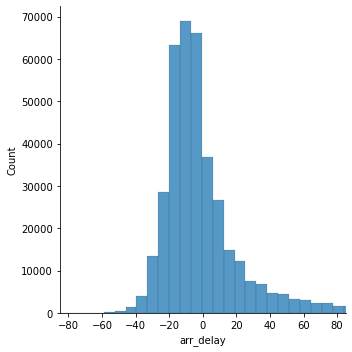

In [11]:
sns.displot(df["arr_delay"], bins=300)
pyplot.xlim(-85, 85)

pyplot.show()

<AxesSubplot:xlabel='arr_delay', ylabel='Count'>

(-85.0, 85.0)

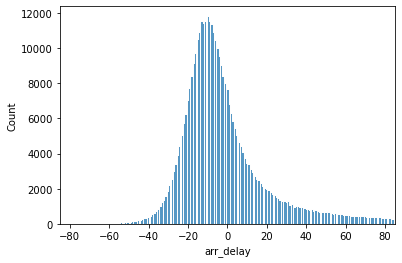

In [12]:
sns.histplot(df["arr_delay"])
pyplot.xlim(-85,85)

**Analysis**

Looks like the distribution is normal but is slightly skewed.  
Mean is probably around -10 minutes when ignoring outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [13]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [14]:
data1 = df[["fl_date", "arr_delay"]].groupby(df["fl_date"].dt.month).median()
data1.index = months

In [15]:
data2 = df2[["fl_date", "arr_delay"]].groupby(df["fl_date"].dt.month).median()
data2.index = months

In [16]:
data3 = df[["fl_date", "arr_delay"]].groupby(df["fl_date"].dt.month).mean()
data3.index = months

In [17]:
data4 = df2[["fl_date", "arr_delay"]].groupby(df["fl_date"].dt.month).mean()
data4.index = months

In [18]:
data1

,arr_delay
Jan,-7
Feb,-6
Mar,-6
Apr,-6
May,-6
Jun,-4
Jul,-5
Aug,-5
Sep,-8
Oct,-6


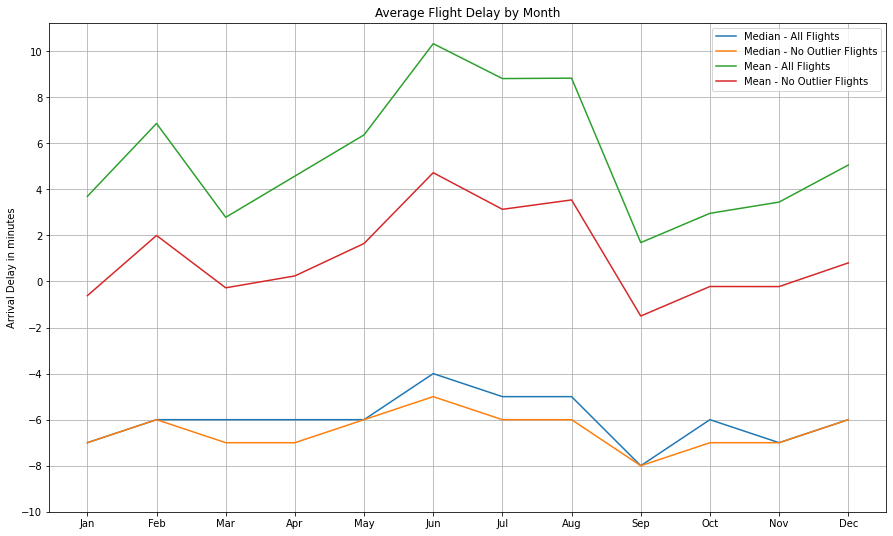

In [19]:
figure = pyplot.figure(figsize=(15,9))

pyplot.plot(data1.index, data1["arr_delay"], label="Median - All Flights")
pyplot.plot(data2.index, data2["arr_delay"], label="Median - No Outlier Flights")
pyplot.plot(data3.index, data3["arr_delay"], label="Mean - All Flights")
pyplot.plot(data4.index, data4["arr_delay"], label="Mean - No Outlier Flights")

pyplot.ylabel("Arrival Delay in minutes")
pyplot.yticks(range(-10, 12, 2))
pyplot.grid()
pyplot.legend()
pyplot.title("Average Flight Delay by Month")

pyplot.show();

**Analysis**

June, July, August, and Feb have the longest delays  
Sep has the least delays

Summer month delays are probably due to higher traffic (lots of people taking summer vacations)  
The spike in delay length during february confuses me

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

I don't know how to go about this...

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [20]:
df2.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2018-03-07,AA,AA,465,AA,N200UU,465,14107,PHX,"Phoenix, AZ",14679,SAN,"San Diego, CA",835,833,-2,13,846,838,2,851,840,-11,76,67,52,304
1,2018-03-07,AA,AA,591,AA,N833AW,591,11057,CLT,"Charlotte, NC",11278,DCA,"Washington, DC",1431,1537,66,16,1553,1648,3,1559,1651,52,88,74,55,331
2,2018-03-07,AA,AA,600,AA,N151UW,600,11697,FLL,"Fort Lauderdale, FL",11057,CLT,"Charlotte, NC",603,557,-6,18,615,746,19,809,805,-4,126,128,91,632
3,2018-03-07,AA,AA,1805,AA,N924US,1805,11057,CLT,"Charlotte, NC",10721,BOS,"Boston, MA",1135,1129,-6,11,1140,1312,12,1352,1324,-28,137,115,92,728
4,2018-03-07,AA,AA,2615,AA,N945NN,2615,11057,CLT,"Charlotte, NC",15370,TUL,"Tulsa, OK",1820,1812,-8,11,1823,1936,6,2002,1942,-20,162,150,133,842


In [21]:
df2["dep_time"].head(15)

0      833
1     1537
2      557
3     1129
4     1812
5      646
6      450
7     1102
8     1226
9      609
10    1556
11    1559
12    2225
13     635
14    2226
Name: dep_time, dtype: int64

In [22]:
(df2["dep_time"] / 100).head(15)

0      8.33
1     15.37
2      5.57
3     11.29
4     18.12
5      6.46
6      4.50
7     11.02
8     12.26
9      6.09
10    15.56
11    15.59
12    22.25
13     6.35
14    22.26
Name: dep_time, dtype: float64

In [23]:
taxi_times = df2[["dep_time", "taxi_out"]].copy()
taxi_times["n_flights"] = 1  # will use this column to count the number of flights departing at given time of day
taxi_times["dep_time"] = taxi_times["dep_time"].round(-1)
# change times like '560' to '600' etc.
taxi_times.loc[taxi_times["dep_time"].astype(str).str.endswith("60"), "dep_time"] = taxi_times.loc[taxi_times["dep_time"].astype(str).str.endswith("60"), "dep_time"].values + 40 

# converting military time to 'continuous time' (e.g. 830 = 8.5)
times = (taxi_times["dep_time"] / 100).values.astype(str)
minutes = np.array([round(int(time.split(".")[1])/6, 2) for time in list(times)])
hour = (taxi_times["dep_time"] // 100).values
hours = hour + minutes
# adding the continuous time column to to data frame
taxi_times["hours"] = hours

In [24]:
taxi_times

,dep_time,taxi_out,n_flights,hours
0,830,13,1,8.50
1,1540,16,1,15.67
2,600,18,1,6.00
3,1130,11,1,11.50
4,1810,11,1,18.17
...,...,...,...,...
390053,1440,16,1,14.67
390054,1300,13,1,13.00
390055,1600,16,1,16.00
390056,1900,12,1,19.00


In [25]:
data1 = taxi_times.groupby("dep_time").agg({"taxi_out": "mean", "n_flights": "count", "hours": "mean"}).round(2)
data1.reset_index(inplace=True)

In [26]:
data1.loc[:50]

,dep_time,taxi_out,n_flights,hours
0,0,16.78,153,0.00
1,10,14.98,236,0.17
2,20,15.40,272,0.33
3,30,15.84,198,0.50
4,40,15.01,227,0.67
5,50,14.35,201,0.83
6,100,14.19,183,1.00
7,110,14.55,119,1.17
8,120,14.75,114,1.33
9,130,14.38,61,1.50


In [27]:
taxi_times = df2[["wheels_on", "taxi_in"]].copy()
taxi_times["n_flights"] = 1
taxi_times["wheels_on"] = taxi_times["wheels_on"].round(-1)
taxi_times.loc[taxi_times["wheels_on"].astype(str).str.endswith("60"), "wheels_on"] = taxi_times.loc[taxi_times["wheels_on"].astype(str).str.endswith("60"), "wheels_on"].values + 40 
data2 = taxi_times.groupby("wheels_on").agg({"taxi_in": "mean", "n_flights": "count"}).round(1)
data2.reset_index(inplace=True)
data2["hours"] = data1["hours"]

In [28]:
data2

,wheels_on,taxi_in,n_flights,hours
0,0,6.1,873,0.00
1,10,6.4,1256,0.17
2,20,6.7,1313,0.33
3,30,6.5,914,0.50
4,40,6.5,923,0.67
...,...,...,...,...
140,2320,6.6,3154,23.33
141,2330,6.6,2569,23.50
142,2340,6.8,2887,23.67
143,2350,6.2,1966,23.83


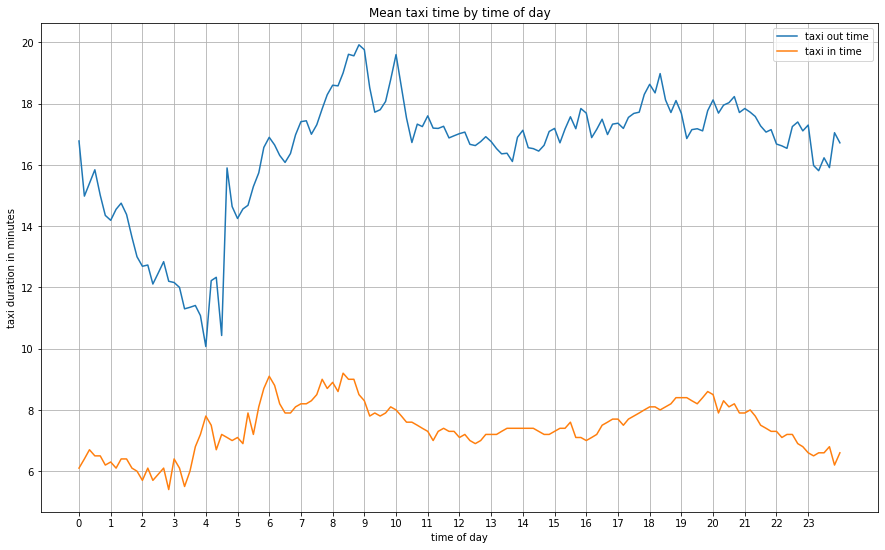

In [29]:
fig4 = pyplot.figure(figsize=(15,9))

pyplot.plot(data1["hours"], data1["taxi_out"], label="taxi out time")
pyplot.plot(data2["hours"], data2["taxi_in"], label="taxi in time")

pyplot.title("Mean taxi time by time of day")
pyplot.xlabel("time of day")
pyplot.xticks(range(0,24,1))
pyplot.ylabel("taxi duration in minutes")

pyplot.grid()
pyplot.legend()

pyplot.show();

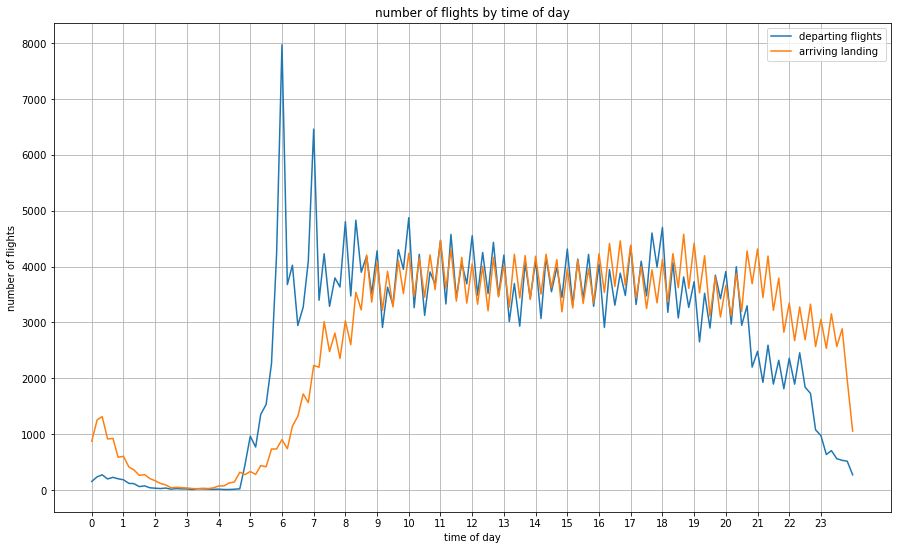

In [30]:
fig4_2 = pyplot.figure(figsize=(15,9))

pyplot.plot(data1["hours"], data1["n_flights"], label="departing flights")
pyplot.plot(data2["hours"], data2["n_flights"], label="arriving landing")

pyplot.title("number of flights by time of day")
pyplot.xlabel("time of day")
pyplot.xticks(range(0,24,1))
pyplot.ylabel("number of flights")

pyplot.grid()
pyplot.legend()

pyplot.show();

**Analysis**  
Taxi out times are always about 10 min longer than taxi in times

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [31]:
delays = df2[["dep_delay", "arr_delay"]].copy()
delays["delay_diff"] = delays["arr_delay"] - delays["dep_delay"]

delays

,dep_delay,arr_delay,delay_diff
0,-2,-11,-9
1,66,52,-14
2,-6,-4,2
3,-6,-28,-22
4,-8,-20,-12
...,...,...,...
390053,-5,-9,-4
390054,11,8,-3
390055,-12,-20,-8
390056,-5,-17,-12


In [32]:
# late arrival & late departure / late arrival
n_delayed_both = (delays["arr_delay"].gt(15) & delays["dep_delay"].gt(15)).sum()
n_delayed_arrival = delays["arr_delay"].gt(15).sum()

In [33]:
n_delayed_both
n_delayed_arrival

n_delayed_both / n_delayed_arrival

50803

66561

0.7632547587926864

**analysis**  
76% of arrival delays are caused by departure delays (delay defined as greater than 15 min late)

In [34]:
for i in range(0, delays["dep_delay"].max(), 5):
    print(f"{i} min dep delay   ", round(delays["delay_diff"][delays["dep_delay"].gt(i)].mean(), 2), "minutes made up for")

0 min dep delay    -4.96 minutes made up for
5 min dep delay    -4.9 minutes made up for
10 min dep delay    -4.8 minutes made up for
15 min dep delay    -4.75 minutes made up for
20 min dep delay    -4.71 minutes made up for
25 min dep delay    -4.7 minutes made up for
30 min dep delay    -4.7 minutes made up for
35 min dep delay    -4.74 minutes made up for
40 min dep delay    -4.77 minutes made up for
45 min dep delay    -4.83 minutes made up for
50 min dep delay    -4.9 minutes made up for
55 min dep delay    -4.98 minutes made up for
60 min dep delay    -5.06 minutes made up for
65 min dep delay    -5.19 minutes made up for
70 min dep delay    -5.38 minutes made up for
75 min dep delay    -5.56 minutes made up for
80 min dep delay    -5.81 minutes made up for
85 min dep delay    -6.1 minutes made up for
90 min dep delay    -6.4 minutes made up for
95 min dep delay    -6.73 minutes made up for
100 min dep delay    -7.14 minutes made up for
105 min dep delay    -7.61 minutes made up

In [35]:
delays.describe()

,dep_delay,arr_delay,delay_diff
count,383866.000000,383866.000000,383866.000000
mean,6.253664,1.138507,-5.115157
std,25.255717,28.469163,13.251408
min,-45.000000,-85.000000,-130.000000
25%,-6.000000,-15.000000,-13.000000
50%,-2.000000,-6.000000,-6.000000
75%,5.000000,7.000000,1.000000
max,233.000000,156.000000,158.000000


#### **Task 6**: How many states cover 50% of US air traffic? 

In [36]:
df2.head()

,fl_date,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance
0,2018-03-07,AA,AA,465,AA,N200UU,465,14107,PHX,"Phoenix, AZ",14679,SAN,"San Diego, CA",835,833,-2,13,846,838,2,851,840,-11,76,67,52,304
1,2018-03-07,AA,AA,591,AA,N833AW,591,11057,CLT,"Charlotte, NC",11278,DCA,"Washington, DC",1431,1537,66,16,1553,1648,3,1559,1651,52,88,74,55,331
2,2018-03-07,AA,AA,600,AA,N151UW,600,11697,FLL,"Fort Lauderdale, FL",11057,CLT,"Charlotte, NC",603,557,-6,18,615,746,19,809,805,-4,126,128,91,632
3,2018-03-07,AA,AA,1805,AA,N924US,1805,11057,CLT,"Charlotte, NC",10721,BOS,"Boston, MA",1135,1129,-6,11,1140,1312,12,1352,1324,-28,137,115,92,728
4,2018-03-07,AA,AA,2615,AA,N945NN,2615,11057,CLT,"Charlotte, NC",15370,TUL,"Tulsa, OK",1820,1812,-8,11,1823,1936,6,2002,1942,-20,162,150,133,842


In [37]:
state_counts1 = df2["origin_city_name"].copy()
state_counts2 = df2["dest_city_name"].copy()

In [38]:
state_counts1 = [ele.split(", ")[1] for ele in list(state_counts1.values)]
state_counts2 = [ele.split(", ")[1] for ele in list(state_counts2.values)]

In [39]:
state_counts1 = pd.Series(state_counts1)
state_counts2 = pd.Series(state_counts2)

In [46]:
state_counts1 = state_counts1.value_counts()
state_counts2 = state_counts2.value_counts()

In [47]:
state_counts1[state_counts1.values.cumsum() <= state_counts1.sum() / 2]

CA    41961
TX    37896
FL    27769
IL    24036
GA    20775
NY    19534
NC    17578
dtype: int64

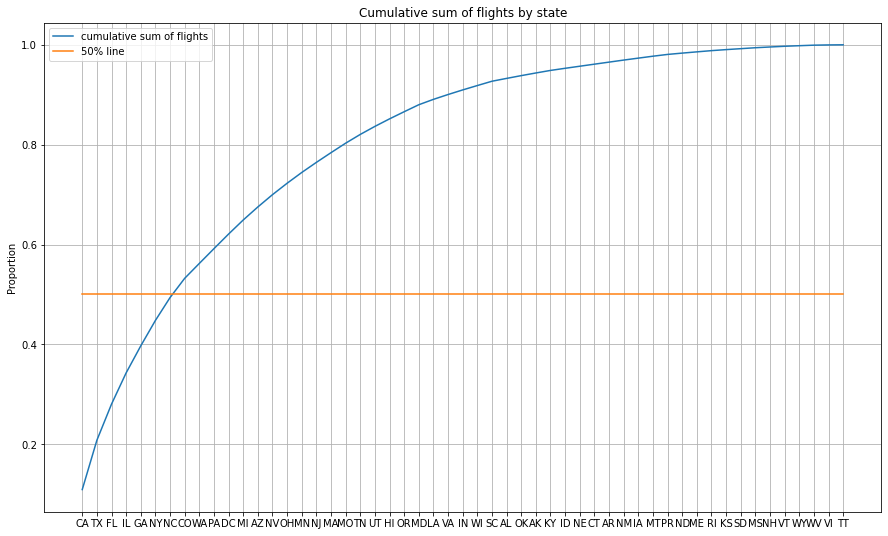

In [48]:
figure6 = pyplot.figure(figsize=(15,9))

pyplot.plot(state_counts1.index, state_counts1.values.cumsum() / state_counts1.sum(), label="cumulative sum of flights")
pyplot.plot(state_counts1.index, [0.5 for state in state_counts1.index], label="50% line")

pyplot.title("Cumulative sum of flights by state")
pyplot.ylabel("Proportion")
pyplot.grid()
pyplot.legend()

pyplot.show();

**Analysis**  
7 States cover 50% of US air traffic

- California
- Texas
- Florida
- Illinois
- Georgia
- New York
- North Carolina

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [49]:
# calculating average difference between arr_delay and dep_delay
# negative numbers means plane arrived earlier than expected
for i in range(0, delays["dep_delay"].max(), 5):
    print(f"{i} min dep delay   ", round(delays["delay_diff"][delays["dep_delay"].gt(i)].mean(), 2), "difference")

0 min dep delay    -4.96 difference
5 min dep delay    -4.9 difference
10 min dep delay    -4.8 difference
15 min dep delay    -4.75 difference
20 min dep delay    -4.71 difference
25 min dep delay    -4.7 difference
30 min dep delay    -4.7 difference
35 min dep delay    -4.74 difference
40 min dep delay    -4.77 difference
45 min dep delay    -4.83 difference
50 min dep delay    -4.9 difference
55 min dep delay    -4.98 difference
60 min dep delay    -5.06 difference
65 min dep delay    -5.19 difference
70 min dep delay    -5.38 difference
75 min dep delay    -5.56 difference
80 min dep delay    -5.81 difference
85 min dep delay    -6.1 difference
90 min dep delay    -6.4 difference
95 min dep delay    -6.73 difference
100 min dep delay    -7.14 difference
105 min dep delay    -7.61 difference
110 min dep delay    -8.1 difference
115 min dep delay    -8.58 difference
120 min dep delay    -9.2 difference
125 min dep delay    -9.95 difference
130 min dep delay    -10.75 difference
135 

In [50]:
x = range(0, delays["dep_delay"].max(), 5)
y = [abs(round(delays["delay_diff"][delays["dep_delay"].gt(delay)].mean(), 2)) for delay in x]

In [51]:
x
y

range(0, 233, 5)

[4.96,
 4.9,
 4.8,
 4.75,
 4.71,
 4.7,
 4.7,
 4.74,
 4.77,
 4.83,
 4.9,
 4.98,
 5.06,
 5.19,
 5.38,
 5.56,
 5.81,
 6.1,
 6.4,
 6.73,
 7.14,
 7.61,
 8.1,
 8.58,
 9.2,
 9.95,
 10.75,
 11.82,
 12.96,
 14.27,
 15.73,
 17.72,
 20.19,
 24.1,
 27.75,
 32.21,
 41.52,
 63.83,
 88.33,
 88.33,
 88.33,
 104.5,
 104.5,
 104.5,
 104.5,
 79.0,
 79.0]

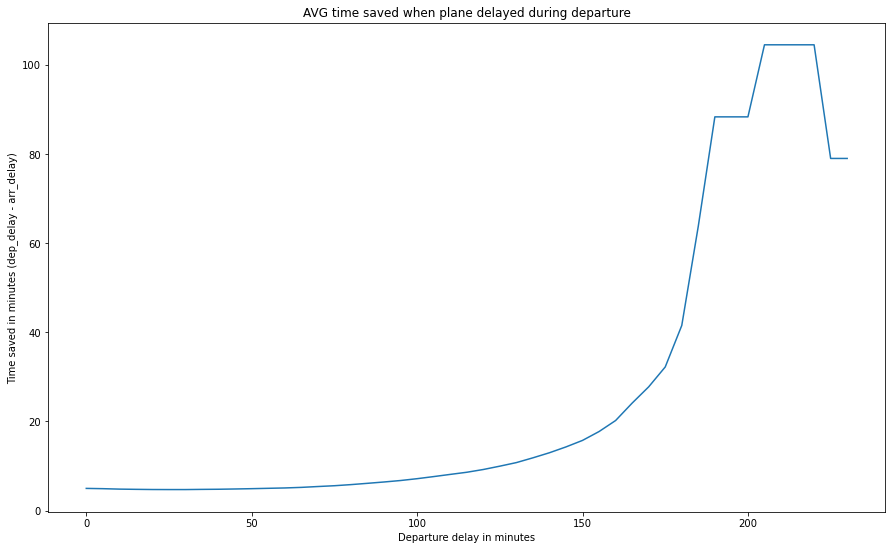

In [52]:
fig7 = pyplot.figure(figsize=(15,9))

pyplot.plot(x, y)

pyplot.title("AVG time saved when plane delayed during departure")
pyplot.xlabel("Departure delay in minutes")
pyplot.ylabel("Time saved in minutes (dep_delay - arr_delay)")
            
pyplot.show();

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?